# 1. Librairie Numpy

In [4]:
# import des modules usuels
import numpy as np
import matplotlib.pyplot as plt

# commande magique pour l'affichage des graphiques
%matplotlib inline

# options d'affichage
plt.style.use('seaborn-darkgrid')

Numpy introduit des tableaux multidimensionnels ndarray.

Un *ndarray* ou tableau multidimensionnel est une structure de données extrêmement puissante en Python.

Les données manipulées peuvent être de différents types : entiers, flottants, booléens, chaines de caractères, etc.

Ils supportent toutes les opérations standards :

- arithmétique
- mathématiques
- logique
- calcul vectoriel et matriciel
- calculs d'agrégats

Voir la documentation https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

## 1.1 Création d'un ndarray

Il existe différentes méthodes pour créer un *ndarray*.

fonction (extrait)|usage
-|-
arange|vecteur de nombres également répartis dans un intervalle (pas)
array|à partir d'un objet de type tableau
zeros|retourne un *ndarray* nul
zeros_like|retourne un *ndarray* nul aux dimensions identiques d'un autre *ndarray*
ones|retourne un *ndarray* unité
ones_like|retourne un *ndarray* unité aux dimensions identiques d'un autre *ndarray*
eye|retourne une matrice nulle avec des 1 sur la première diagonale
identity|retourne une matrice identité
full|retourne une matrice avec une valeur uniforme
linspace|vecteur de nombres également répartis dans un intervalle (nombre)

In [5]:
# création d'un vecteur (dimension 1)
a = np.arange(48)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [6]:
a?

In [7]:
type(a)

numpy.ndarray

In [8]:
# nombre de dimensions d'un ndarray
a.ndim

1

In [9]:
# dimensions d'un ndarray
a.shape

(48,)

In [10]:
# nombre d'éléments d'un ndarray
a.size

48

In [11]:
# type des éléments d'un ndarray
a.dtype

dtype('int32')

On peut créer manuellement un ndarray de nombres flottants.

In [12]:
a = np.array(range(48), float)
a

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.])

In [13]:
a.dtype

dtype('float64')

On peut créer explicitement un ndarray.

In [14]:
# création explicite
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], float)
a

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

In [15]:
# matrice de 0 identique
np.zeros_like(a)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

On peut créer un vecteur d'éléments uniformément répartis : intervalle fermé + nombre d'éléments (utile pour les graphiques).

In [16]:
# vecteur d'éléments uniformément répartis
a = np.linspace(0, 100, 21)
a

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.])

#### Nombres pseudo-aléatoires

Le sous-module **numpy.random** permet de générer des nombres aléatoires selon plusieurs méthodes (extrait).

La méthode *seed()* permet d'amorcer le générateur de nombres aléatoires afin d'obtenir les mêmes résultats d'une expérience à l'autre.

Il existe des fonctions pour créer des *ndarray* avec des nombres aléatoires (extrait).

Fonction|Usage
-|-
randint|vecteur d'entiers aléatoires uniformément répartis dans un intervalle
random|vecteur de nombres aléatoires uniformément répartis dans un intervalle semi-ouvert
uniform|vecteur de nombres aléatoires uniformément répartis dans un intervalle
normal|vecteur de nombres répartis selon la loi normale

In [17]:
# tableau d'entiers aléatoires uniformément répartis entre 0 et 9
a = np.random.randint(0, 10, 10)
a

array([6, 9, 4, 5, 8, 1, 6, 8, 4, 1])

In [18]:
# avec la méthode seed
np.random.seed(0)
a = np.random.randint(0, 10, 10)
#np.random.seed(0)
b = np.random.randint(0, 10, 10)
a, b

(array([5, 0, 3, 3, 7, 9, 3, 5, 2, 4]), array([7, 6, 8, 8, 1, 6, 7, 7, 8, 1]))

#### Visualisation graphique des distributions aléatoires

N.B. : la librairie **matplotlib.pyplot** sera étudiées plus en détail plus loin.

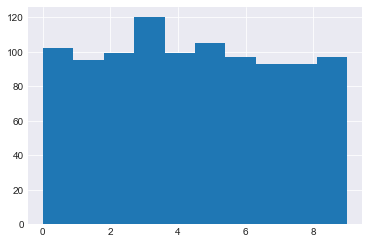

In [19]:
# histogramme de 1000 entiers tirés aléatoirement entre 0 et 9
a = np.random.randint(0, 10, 1000)
plt.hist(a);

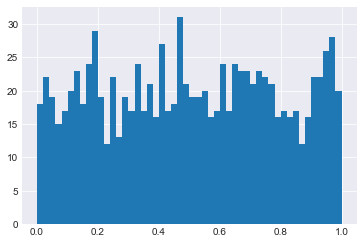

In [20]:
# histogramme de 1000 nombres flottants tirés uniformément entre 0 et 1
np.random.seed(37)
a = np.random.random(1000)
plt.hist(a, bins=50);

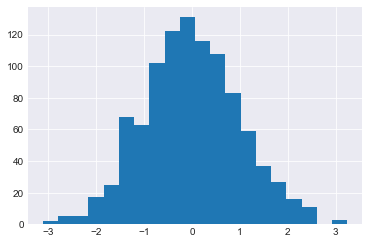

In [21]:
# histogramme de nombres tirés selon une loi normale
a = np.random.normal(0, 1, 1000)
plt.hist(a, bins=20);

## 1.2 Accès aux éléments

L'opérateur [] permet d'accéder aux éléments individuels ou à des sous-tableaux.

Rappel sur les accès par indices en Python qui s'applique aux *ndarray*.

Notation|Signification
-|-
a[i]|accès à l'élement situé à la position i (démarrant à 0)
a[i:j]|accès aux élements situés entre la position i et la position j-1
a[i:j:k]|accès aux élements situés entre la position i et la position j-1 par pas de k
a[:i]| accès à tous les éléments jusqu'à la position i-1
a[i:]|accès à tous les éléments à partir de la position i
a[:]|accès à tous les éléments
a[::-1]|accès à tous les éléments dans l'ordre inverse

Le multidimensionnel est géré par autant d'accès indiciels séparés par des virgules :
- vecteur : *a[i:j]*
- matrice : *a[i:j, m:n]*
- cube : *a[i:j, m:n, p:q]*

Pour une matrice, la notation *a[i, j]* est symboliquement équivalente à *a[i][j]*.

**Exercice**

Créer une matrice 6 x 6 remplie d’entiers aléatoires entre 0 et 9 inclus et sélectionner les entiers situés sur les lignes 2 à 4 inclus et les colonnes 2 et 3 inclus.

## 1.3 Modification des éléments

Les opérations de sélection permettent de modifier les éléments avec l'opérateur *=*.

Il est possible d'utiliser une valeur scalaire ou un ndarray de dimensions identiques.

In [22]:
# création de la matrice
a = np.random.randint(0, 10, (6, 6))
a[2:4, 2:4] = -1
a

array([[ 1,  7,  5,  4,  1,  7],
       [ 0,  7,  5,  7,  2,  9],
       [ 4,  0, -1, -1,  7,  6],
       [ 4,  8, -1, -1,  3,  7],
       [ 9,  2,  9,  8,  2,  7],
       [ 1,  3,  7,  4,  5,  8]])

In [23]:
# remplissage d'un ndarray avec une valeur uniforme
a.fill(-1)
a

array([[-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1]])

## 1.4 Opérations de transformation

Il est possible de transformer un ndarray en un tableau de n'importe quelle dimension (du moment que le nombre total d'éléments soit identique).

In [24]:
# création d'un vecteur
a = np.random.randint(0, 9, 48)
a

array([7, 3, 5, 1, 6, 8, 5, 7, 2, 1, 2, 8, 0, 3, 8, 6, 7, 1, 4, 3, 0, 6, 3,
       0, 7, 5, 8, 4, 0, 0, 4, 7, 8, 0, 4, 0, 2, 4, 1, 3, 4, 2, 6, 0, 7, 2,
       6, 4])

In [25]:
# transformation en matrice
a = a.reshape(8, 6)
a

array([[7, 3, 5, 1, 6, 8],
       [5, 7, 2, 1, 2, 8],
       [0, 3, 8, 6, 7, 1],
       [4, 3, 0, 6, 3, 0],
       [7, 5, 8, 4, 0, 0],
       [4, 7, 8, 0, 4, 0],
       [2, 4, 1, 3, 4, 2],
       [6, 0, 7, 2, 6, 4]])

Il est possible de mettre à plat un ndarray en lignes ou en colonnes.

In [26]:
# par défaut en ligne (mode langage C)
a.flatten()

array([7, 3, 5, 1, 6, 8, 5, 7, 2, 1, 2, 8, 0, 3, 8, 6, 7, 1, 4, 3, 0, 6, 3,
       0, 7, 5, 8, 4, 0, 0, 4, 7, 8, 0, 4, 0, 2, 4, 1, 3, 4, 2, 6, 0, 7, 2,
       6, 4])

In [27]:
# en colonne (mode langage Fortran)
a.flatten('F')

array([7, 5, 0, 4, 7, 4, 2, 6, 3, 7, 3, 3, 5, 7, 4, 0, 5, 2, 8, 0, 8, 8, 1,
       7, 1, 1, 6, 6, 4, 0, 3, 2, 6, 2, 7, 3, 0, 4, 4, 6, 8, 8, 1, 0, 0, 0,
       2, 4])

In [28]:
# transposition
a.transpose()  # ou a.T

array([[7, 5, 0, 4, 7, 4, 2, 6],
       [3, 7, 3, 3, 5, 7, 4, 0],
       [5, 2, 8, 0, 8, 8, 1, 7],
       [1, 1, 6, 6, 4, 0, 3, 2],
       [6, 2, 7, 3, 0, 4, 4, 6],
       [8, 8, 1, 0, 0, 0, 2, 4]])

In [29]:
a.T

array([[7, 5, 0, 4, 7, 4, 2, 6],
       [3, 7, 3, 3, 5, 7, 4, 0],
       [5, 2, 8, 0, 8, 8, 1, 7],
       [1, 1, 6, 6, 4, 0, 3, 2],
       [6, 2, 7, 3, 0, 4, 4, 6],
       [8, 8, 1, 0, 0, 0, 2, 4]])

In [30]:
# tri
a = a.flatten()
a.sort()
a

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8,
       8, 8])

In [31]:
# seuillage
a = np.random.random(20).reshape((4, 5))
a.clip(0.2, 0.8)

array([[ 0.2       ,  0.35483168,  0.25244961,  0.8       ,  0.39844298],
       [ 0.8       ,  0.5553342 ,  0.21857639,  0.23296873,  0.23841231],
       [ 0.2       ,  0.20328055,  0.2       ,  0.23369958,  0.47294573],
       [ 0.8       ,  0.8       ,  0.79522325,  0.67453438,  0.8       ]])

## 1.5 Opérations arithmétiques,  logiques, mathématiques et matricielles

Numpy possède toutes les fonctions arithmétiques, de comparaison, logiques, mathématiques, trigonométriques et de calcul matriciel.

Domaine|Fonctions
-|-
Arithmétique | + (add) - (subtract) &#42; (multiply) / (divide) &#42;&#42; (power)
Comparaison | ==, !=, =<, <, =>, >
Logique | & (and) &#124; (or) ~ (not) all() any() allclose()
Mathématiques | abs sign sqrt log log10 exp floor ceil rint
Trigonométrie | sin cos tan arcsin arccos arctan sinh cosh tanh arcsinh arccosh arctanh
Calcul matriciel | @ (dot) T (transpose)

**Exercice**

Fabriquer un vecteur de 10 entiers aléatoires entre 0 et 9 inclus.
Tester si tous les entiers sont nuls. Si l'un des entiers est nul avec *all()* et *any()*.

## 1.6 Sélection logique

L'opérateur [] permet d'effectuer une sélection logique à partir d'un masque booléen.

Les opérateur logiques sont : | (OU), & (ET) et ~ (NON).

In [32]:
# ndarray
a = np.random.randint(0, 10, 20)
a

array([8, 2, 1, 4, 1, 6, 3, 5, 7, 9, 2, 7, 1, 7, 0, 6, 7, 8, 0, 8])

In [33]:
# masque booléen
m = a < 5
m

array([False,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True, False,  True, False, False, False,
        True, False], dtype=bool)

In [34]:
# sélection par masque booléen
a[m]

array([2, 1, 4, 1, 3, 2, 1, 0, 0])

In [35]:
# expression concise
a[a < 5]

array([2, 1, 4, 1, 3, 2, 1, 0, 0])

**Exercice**

Fabriquer un vecteur aléatoire comportant 100 entiers compris en 0 et 9 inclus.

Sélectionner les entiers qui sont différent de 0, inférieurs à 7 et pairs.

## 1.7 Agrégats

Il existe des fonctions agrégatives qui synthétisent les valeurs d'un *ndarray*.

Il est possible d'appliquer ces fonctions sur l'ensemble d'un *ndarray* ou bien selon une dimension particulière. Cette dimension est dénommée *axis* dans le jargon de Python et vaut 0, 1, 2...

Atention, dans les opérations de synthèse, *axis* correspond à la dimension dans laquelle l'indice servant à effectuer la synthèse varie.

Par exemple, une matrice possède 2 dimensions : *axis=0* réprésente l'indice des lignes et *axis=1* représente l'indice des colonnes. Pour calculer la somme des lignes, on additionne les colonnes (*axis=1*) et inversement pour calculer la somme des colonnes, on additionne les lignes (*axis=0*).

Fonction|Usage
-|-
sum|calcul de la somme
prod|calcul du produit
min|calcul du minimum
max|calcul du maximum
argmin|calcul de l'indice du minimum
argmax|calcul de l'indice du maximum
cumsum|calcul de la somme cumulée
cumprod|calcul du produit cumulé
mean|calcul de la moyenne
median|calcul de la médiane

**Exercice**

Fabriquer une matrice 7 x 5 d'entiers aléatoires entre 0 et 3 inclus.

Calculer la somme totale, la somme des lignes, la somme des colonnes.

Afficher une marche aléatoire où à chaque pas on avance d'un nombre compris entre -0.5 et 0.5.

## 1.8 Algèbre linéaire

Les méthodes classiques utilisées en algèbre linéaire existent dans le sous-module *nupy.linalg* :
- inversion : *inv()*
- vecteurs propres, valeurs propres :  *eig()*, *eigvals()*
- décomposition en valeurs singulières : *svd()*
- etc.

In [36]:
# diagonalisation d'une matrice 3 x 3
a = np.random.random(9).reshape((3, 3))
print("a =", a)
d, p = np.linalg.eig(a)
print("d =", np.diag(d))
print("p =", p)
# on vérifie que a = p x d x p-1
delta = a - p.dot(np.diag(d)).dot(np.linalg.inv(p))
np.allclose(delta, 0)

a = [[ 0.7072647   0.88054825  0.85283276]
 [ 0.61363914  0.85268656  0.146915  ]
 [ 0.25287134  0.81490106  0.18468477]]
d = [[ 1.79854991+0.j          0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j         -0.02695694+0.33421168j  0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j         -0.02695694-0.33421168j]]
p = [[ 0.74337850+0.j          0.70736442+0.j          0.70736442-0.j        ]
 [ 0.54294948+0.j         -0.36975498-0.2257038j  -0.36975498+0.2257038j ]
 [ 0.39063315+0.j         -0.22721355+0.51024369j -0.22721355-0.51024369j]]


True

**Exercice**

On considère une matrice m (2 x 100) définie par :
   - x = np.random.random(100)
   - y = x * (1 + np.random.random(100)) / 2

Produire un graphique correspondant à la matrice.

Appliquer la fonction SVD (option *full_matrices=False*) à m, renvoyant : u, v, s

Vérifier l'égalité m = u x s x v

Produire un graphique correspondant à la matrice transformée par la rotation u.